In [1]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [12]:
df.shape

(1697, 8)

In [10]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [13]:
df['label'].unique()

array(['rice', 'maize', 'Soyabeans', 'beans', 'peas', 'groundnuts',
       'cowpeas', 'banana', 'mango', 'grapes', 'watermelon', 'apple',
       'orange', 'cotton', 'coffee'], dtype=object)

In [14]:
df['label'].value_counts()

label
rice          139
Soyabeans     130
banana        130
beans         125
cowpeas       122
orange        122
maize         119
coffee        110
peas          100
groundnuts    100
mango         100
grapes        100
watermelon    100
apple         100
cotton        100
Name: count, dtype: int64

In [15]:
X=df.drop(columns="label")
y=df['label']


In [18]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
le=LabelEncoder()
sc=StandardScaler()

In [21]:

le.fit_transform(y_train)
le.fit_transform(y_test)

array([ 6,  9,  9,  3,  5,  4,  6,  2,  4,  2, 11, 12, 12,  0, 11,  5, 10,
       11,  3, 12,  9, 13,  2, 13, 13,  7,  1,  2, 12,  8,  9,  3, 11,  1,
        7,  8,  4,  2, 12,  8,  0, 10,  3, 10,  6,  7, 14,  1,  7, 13, 13,
        6, 13,  3,  4,  7,  0,  6,  0,  2,  8,  3,  4,  8, 10,  2,  5, 13,
        5, 12,  6, 12, 12, 13,  3,  4,  3, 12, 14,  5,  0, 13,  5,  5, 11,
        0, 10, 13,  3, 13, 11,  5,  6, 10, 14,  0, 14, 12,  5,  8,  3,  5,
        7,  2,  0, 12,  0,  0,  1,  8,  7, 12, 13, 12,  5, 11,  3, 11, 10,
       10,  2, 14,  8, 14, 14, 10, 13,  4,  8,  3, 10, 13,  5, 10,  3,  9,
        5,  3,  1,  2,  8,  3,  5,  6,  0,  9, 12, 14, 10,  0,  3,  1,  4,
        0,  0,  9,  9,  5,  8,  4, 10, 14,  5, 12,  3, 10,  0, 12,  4, 12,
        6, 14, 13,  8,  5,  9,  8,  2, 13,  9,  8,  6,  3, 10,  3,  1,  3,
        1, 13,  3, 13,  2,  8,  4, 11,  8,  6,  0, 12,  9, 11,  5, 14, 11,
        2,  6,  7,  4, 14, 13,  2,  5,  3,  7,  3, 11,  1,  7,  4, 13, 14,
        7,  9, 14,  7,  8

In [22]:
sc.fit(X_train)

StandardScaler()

In [23]:
sc.transform(X_train)
sc.transform(X_test)

array([[-0.88936497, -0.65455539, -0.48880334, ...,  0.71448045,
         0.48082076, -0.98936224],
       [ 0.25394562,  0.0185691 , -0.52433125, ..., -0.45108406,
        -0.30607981, -0.70182638],
       [ 1.16339722, -0.39115885, -0.5420952 , ...,  0.32184442,
         0.06469931,  0.1599504 ],
       ...,
       [-0.86338064,  1.89161115,  2.70870879, ...,  0.60024878,
         0.02166618, -0.67532422],
       [-0.78542764,  0.0185691 , -0.57762312, ..., -0.32902919,
        -1.42064563, -0.79109691],
       [-1.30511427,  0.57462846, -0.47103938, ..., -1.78215155,
        -0.99791371, -0.73156965]])

In [24]:
dtc=DecisionTreeClassifier()

In [25]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred=dtc.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

1.0

In [28]:
cm=confusion_matrix(y_test,y_pred)

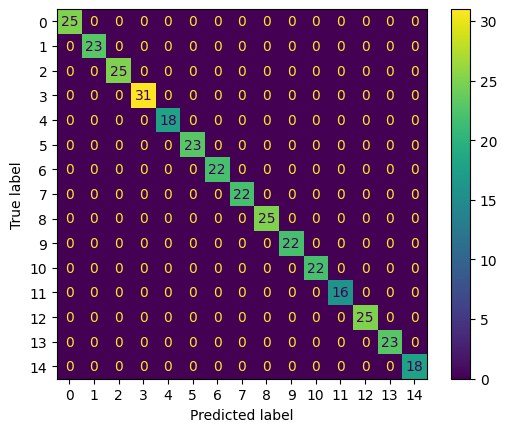

In [29]:
ConfusionMatrixDisplay(cm).plot()

In [30]:
dtc.predict(pd.DataFrame([[50,60,80,23,12.2,5.6,205.12]],columns=['N','P', 'K' ,'temperature' ,'humidity','ph','rainfall']))

array(['Soyabeans'], dtype=object)

In [31]:
import pickle as pkl

In [32]:
pkl.dump(dtc,open("decision_tree_model.pkl","wb"))

In [33]:
model=pkl.load(open("decision_tree_model.pkl","rb"))

In [34]:
model.predict(pd.DataFrame([[90,90,29,83,132,6.8,255.12]],columns=['N','P', 'K' ,'temperature' ,'humidity','ph','rainfall']))

array(['apple'], dtype=object)